In [ ]:
!pip install minepy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minepy import MINE

### Purpose：In this experiment, the maximum mutual information coefficient（MIC） and Pearson correlation coefficient are used to conduct correlation analysis on the influencing factors of users' electricity consumption data, and the nonlinear relationship between different data features is effectively mined.Through the results of correlation analysis, feature selection is carried out, and the strong correlation features are input into the deep neural network for further analysis to reduce the redundancy calculation and realize the real-time and efficient processing of power data.

# 1. Data Preprocessing

# (1) Electricity load data preprocessing

In [ ]:

df = pd.read_csv("Load_history.csv") 
df

,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,h7,h8
0,1,2019,1,1,588,188,164,3768,4112,5417,7772,1225
1,1,2019,2,1,610,195,170,3904,4260,5612,8052,1269
2,1,2019,3,1,823,236,230,5272,5753,7579,10869,1713
3,1,2019,4,1,1053,337,294,6742,7358,9692,13921,2191
4,1,2019,5,1,1374,439,384,8798,9601,12648,18147,2859
5,1,2019,6,1,1236,395,346,7910,8632,11371,16315,2571
6,1,2019,7,1,1258,402,352,8054,8789,11578,16612,2618
7,1,2019,8,1,1368,437,383,8758,9558,12590,18102,2846
8,1,2019,9,1,1627,520,455,10417,11368,14975,21468,3386
9,1,2019,10,1,1161,371,325,7433,8112,10686,15311,2416


In [38]:
#Extract the electricity consumption data of University 1 in 2019 and 2021 for analysis
df_zone1 = df.loc[(df["zone_id"] == 1)&((df["year"] == 2019)|(df["year"] == 2021))]
df_zone1.info()
df_zone1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 35
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   zone_id  24 non-null     int64
 1   year     24 non-null     int64
 2   month    24 non-null     int64
 3   day      24 non-null     int64
 4   h1       24 non-null     int64
 5   h2       24 non-null     int64
 6   h3       24 non-null     int64
 7   h4       24 non-null     int64
 8   h5       24 non-null     int64
 9   h6       24 non-null     int64
 10  h7       24 non-null     int64
 11  h8       24 non-null     int64
dtypes: int64(12)
memory usage: 2.4 KB


,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,h7,h8
0,1,2019,1,1,588,188,164,3768,4112,5417,7772,1225
1,1,2019,2,1,610,195,170,3904,4260,5612,8052,1269
2,1,2019,3,1,823,236,230,5272,5753,7579,10869,1713
3,1,2019,4,1,1053,337,294,6742,7358,9692,13921,2191
4,1,2019,5,1,1374,439,384,8798,9601,12648,18147,2859
5,1,2019,6,1,1236,395,346,7910,8632,11371,16315,2571
6,1,2019,7,1,1258,402,352,8054,8789,11578,16612,2618
7,1,2019,8,1,1368,437,383,8758,9558,12590,18102,2846
8,1,2019,9,1,1627,520,455,10417,11368,14975,21468,3386
9,1,2019,10,1,1161,371,325,7433,8112,10686,15311,2416


In [ ]:
#Extractions of power load H8 and influence factors month,day, H5, H6 and H7 of the target data were extracted
df_factors1 = df_zone1.loc[:,["year","month","day","h1","h2","h3","h4","h5","h6","h7","h8"]].iloc[1:,:]
df_factors1.index=range(0,len(df_factors1))
df_factors1

,year,month,day,h1,h2,h3,h4,h5,h6,h7,h8
0,2019,2,1,610,195,170,3904,4260,5612,8052,1269
1,2019,3,1,823,236,230,5272,5753,7579,10869,1713
2,2019,4,1,1053,337,294,6742,7358,9692,13921,2191
3,2019,5,1,1374,439,384,8798,9601,12648,18147,2859
4,2019,6,1,1236,395,346,7910,8632,11371,16315,2571
5,2019,7,1,1258,402,352,8054,8789,11578,16612,2618
6,2019,8,1,1368,437,383,8758,9558,12590,18102,2846
7,2019,9,1,1627,520,455,10417,11368,14975,21468,3386
8,2019,10,1,1161,371,325,7433,8112,10686,15311,2416
9,2019,11,1,1379,441,386,8825,9631,12687,18149,2868


In [ ]:
#Extraction of influence factors D-1 H8 (electricity consumption at the same time the day before)
df_factors2 = df_zone1.loc[:,["h8"]].iloc[:-1,:]
df_factors2.columns=["d-1_h8"]
df_factors2.index=range(0,len(df_factors2))
df_factors2

,d-1_h8
0,1225
1,1269
2,1713
3,2191
4,2859
5,2571
6,2618
7,2846
8,3386
9,2416


In [ ]:
#Combine the influencing factors
df_factors3 = df_factors1.join(df_factors2).loc[:,["year","month","day","h1","h2","h3","h4","h5","h6","h7","d-1_h8","h8"]]
df_factors3.info()
df_factors3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    23 non-null     int64
 1   month   23 non-null     int64
 2   day     23 non-null     int64
 3   h1      23 non-null     int64
 4   h2      23 non-null     int64
 5   h3      23 non-null     int64
 6   h4      23 non-null     int64
 7   h5      23 non-null     int64
 8   h6      23 non-null     int64
 9   h7      23 non-null     int64
 10  d-1_h8  23 non-null     int64
 11  h8      23 non-null     int64
dtypes: int64(12)
memory usage: 2.3 KB


,year,month,day,h1,h2,h3,h4,h5,h6,h7,d-1_h8,h8
0,2019,2,1,610,195,170,3904,4260,5612,8052,1225,1269
1,2019,3,1,823,236,230,5272,5753,7579,10869,1269,1713
2,2019,4,1,1053,337,294,6742,7358,9692,13921,1713,2191
3,2019,5,1,1374,439,384,8798,9601,12648,18147,2191,2859
4,2019,6,1,1236,395,346,7910,8632,11371,16315,2859,2571
5,2019,7,1,1258,402,352,8054,8789,11578,16612,2571,2618
6,2019,8,1,1368,437,383,8758,9558,12590,18102,2618,2846
7,2019,9,1,1627,520,455,10417,11368,14975,21468,2846,3386
8,2019,10,1,1161,371,325,7433,8112,10686,15311,3386,2416
9,2019,11,1,1379,441,386,8825,9631,12687,18149,2416,2868


## （2） Weather data proprecessing

In [39]:
#Read the temperatures  from January 1, 2019 to december 1, 2021
df2 = pd.read_csv("temperature_history.csv")
df2

,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,h7,h8
0,1,2019,1,1,18,18,18,18,18,18,18,18
1,1,2019,2,1,26,26,26,26,26,26,26,26
2,1,2019,3,1,34,34,34,34,34,34,34,34
3,1,2019,4,1,43,43,43,43,43,43,43,43
4,1,2019,5,1,48,48,48,48,48,48,48,48
5,1,2019,6,1,47,47,47,47,47,47,47,47
6,1,2019,7,1,54,54,54,54,54,54,54,54
7,1,2019,8,1,46,46,46,46,46,46,46,46
8,1,2019,9,1,35,35,35,35,35,35,35,35
9,1,2019,10,1,22,22,22,22,22,22,22,22


In [40]:
#Extraction of temperature data from University  1 in 2021  as influencing factors
df_station1 = df2.loc[(df2["zone_id"] == 1)&((df2["year"] == 2019)|(df2["year"] == 2021))]
df_station1.info()
df_station1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 35
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   zone_id  24 non-null     int64
 1   year     24 non-null     int64
 2   month    24 non-null     int64
 3   day      24 non-null     int64
 4   h1       24 non-null     int64
 5   h2       24 non-null     int64
 6   h3       24 non-null     int64
 7   h4       24 non-null     int64
 8   h5       24 non-null     int64
 9   h6       24 non-null     int64
 10  h7       24 non-null     int64
 11  h8       24 non-null     int64
dtypes: int64(12)
memory usage: 2.4 KB


,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,h7,h8
0,1,2019,1,1,18,18,18,18,18,18,18,18
1,1,2019,2,1,26,26,26,26,26,26,26,26
2,1,2019,3,1,34,34,34,34,34,34,34,34
3,1,2019,4,1,43,43,43,43,43,43,43,43
4,1,2019,5,1,48,48,48,48,48,48,48,48
5,1,2019,6,1,47,47,47,47,47,47,47,47
6,1,2019,7,1,54,54,54,54,54,54,54,54
7,1,2019,8,1,46,46,46,46,46,46,46,46
8,1,2019,9,1,35,35,35,35,35,35,35,35
9,1,2019,10,1,22,22,22,22,22,22,22,22


In [ ]:
#Extraction of influencing factor TEMP H8: the temperature of the day
df_factors4 = df_station1.loc[:,["h8"]].iloc[1:,:]
df_factors4.index=range(0,len(df_factors4))
df_factors4.columns=["temp_h8"]
df_factors4.info()
df_factors4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   temp_h8  23 non-null     int64
dtypes: int64(1)
memory usage: 312.0 bytes


,temp_h8
0,26
1,34
2,43
3,48
4,47
5,54
6,46
7,35
8,22
9,20


In [ ]:
#Combine the temperature, the influence factors of historical electricity consumption and date type
df_factors5 = df_factors3.join(df_factors4).loc[:,["year","month","day","h1","h2","h3","h4","h5","h6","h7","d-1_h8","temp_h8","h8"]]
df_factors5.info()
df_factors5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   year     23 non-null     int64
 1   month    23 non-null     int64
 2   day      23 non-null     int64
 3   h1       23 non-null     int64
 4   h2       23 non-null     int64
 5   h3       23 non-null     int64
 6   h4       23 non-null     int64
 7   h5       23 non-null     int64
 8   h6       23 non-null     int64
 9   h7       23 non-null     int64
 10  d-1_h8   23 non-null     int64
 11  temp_h8  23 non-null     int64
 12  h8       23 non-null     int64
dtypes: int64(13)
memory usage: 2.5 KB


,year,month,day,h1,h2,h3,h4,h5,h6,h7,d-1_h8,temp_h8,h8
0,2019,2,1,610,195,170,3904,4260,5612,8052,1225,26,1269
1,2019,3,1,823,236,230,5272,5753,7579,10869,1269,34,1713
2,2019,4,1,1053,337,294,6742,7358,9692,13921,1713,43,2191
3,2019,5,1,1374,439,384,8798,9601,12648,18147,2191,48,2859
4,2019,6,1,1236,395,346,7910,8632,11371,16315,2859,47,2571
5,2019,7,1,1258,402,352,8054,8789,11578,16612,2571,54,2618
6,2019,8,1,1368,437,383,8758,9558,12590,18102,2618,46,2846
7,2019,9,1,1627,520,455,10417,11368,14975,21468,2846,35,3386
8,2019,10,1,1161,371,325,7433,8112,10686,15311,3386,22,2416
9,2019,11,1,1379,441,386,8825,9631,12687,18149,2416,20,2868


## (3) Holiday data reprocessing

In [37]:
import calendar
df3 = pd.read_csv("Holiday_List.csv")
df3

,Unnamed: 0,2019,2020,2021
0,New Year's Day,"Tuesday, January 1","Wednesday,January 1","Friday,January 1"
1,Birthday of Swami Vivekananda,"Saturday, January 12","Sunday,January 12","Tuesday,January 12"
2,Birthday of Netaji,"Monday, January 23","Thursday,January 23","Saturday,January 23"
3,Republic Day,"Saturday, January 26","Sunday,January 26","Tuesday,January 26"
4,Saraswati Puja (Sree Panchami),"Wednesday, January 30","Thursday,January 30","Tuesday,February 16"
5,Additional day in connection with Saraswati Puja,"Thursday, January 31","Friday,January 31","Wednesday,February 17"
6,Shivratri,"Monday, March 4","Friday,February 21","Thursday,March 11"
7,Doljatra,"Thursday, March 21","Monday,March 9","Sunday,March 28"
8,Holi (Day after Doljatra),"Friday, March 22","Tuesday,March 10","Monday,March 29"
9,Good Friday,"Wednesday, April 10","Friday,April 10","Friday,April 2"


In [ ]:
#Extract 2019 holiday week, date
l1 = [j for i in df3["2019"].str.split(", ").tolist() for j in i]
#Extract date, excluding week data
l2 = [j for i in pd.Series(l1[1::2]).str.split(" ").tolist() for j in i]
#Extract holiday month numbers
mon = [list(calendar.month_name).index(i) for i in l2[::2]]
#Extract holiday day numbers
day = [int(i) for i in l2[1::2]]
#The extracted month and date are composed of a DataFrame
date = pd.DataFrame(np.vstack((mon,day))).transpose()
date.columns = ["month", "day"]
date

,month,day
0,1,1
1,1,12
2,1,23
3,1,26
4,1,30
5,1,31
6,3,4
7,3,21
8,3,22
9,4,10


In [ ]:
#Generate the holiday influencing factor dataframe
holiday = pd.DataFrame(np.full((date.shape[0],1), 3), columns=["holiday"])
df_factors6 = date.join(holiday)
df_factors6

,month,day,holiday
0,1,1,3
1,1,12,3
2,1,23,3
3,1,26,3
4,1,30,3
5,1,31,3
6,3,4,3
7,3,21,3
8,3,22,3
9,4,10,3


In [ ]:
df_factors7 = df_factors5.merge(df_factors6, how="left")
df_factors7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     23 non-null     int64  
 1   month    23 non-null     int64  
 2   day      23 non-null     int64  
 3   h1       23 non-null     int64  
 4   h2       23 non-null     int64  
 5   h3       23 non-null     int64  
 6   h4       23 non-null     int64  
 7   h5       23 non-null     int64  
 8   h6       23 non-null     int64  
 9   h7       23 non-null     int64  
 10  d-1_h8   23 non-null     int64  
 11  temp_h8  23 non-null     int64  
 12  h8       23 non-null     int64  
 13  holiday  3 non-null      float64
dtypes: float64(1), int64(13)
memory usage: 2.7 KB


In [ ]:
df_factors7.fillna(1,inplace=True)

In [ ]:
df_factors8 = df_factors7[["year","month","day","holiday","h1","h2","h3","h4","h5","h6","h7","d-1_h8","temp_h8","h8"]]
df_factors8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     23 non-null     int64  
 1   month    23 non-null     int64  
 2   day      23 non-null     int64  
 3   holiday  23 non-null     float64
 4   h1       23 non-null     int64  
 5   h2       23 non-null     int64  
 6   h3       23 non-null     int64  
 7   h4       23 non-null     int64  
 8   h5       23 non-null     int64  
 9   h6       23 non-null     int64  
 10  h7       23 non-null     int64  
 11  d-1_h8   23 non-null     int64  
 12  temp_h8  23 non-null     int64  
 13  h8       23 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 2.7 KB


In [ ]:
df_factors8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     23 non-null     int64  
 1   month    23 non-null     int64  
 2   day      23 non-null     int64  
 3   holiday  23 non-null     float64
 4   h1       23 non-null     int64  
 5   h2       23 non-null     int64  
 6   h3       23 non-null     int64  
 7   h4       23 non-null     int64  
 8   h5       23 non-null     int64  
 9   h6       23 non-null     int64  
 10  h7       23 non-null     int64  
 11  d-1_h8   23 non-null     int64  
 12  temp_h8  23 non-null     int64  
 13  h8       23 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 2.7 KB


# 2. Maximum Mutual Information Coefficient (MIC) Correlation Analysis

## （1） Correlation analysis with temperature data

MIC: 0.18867116054593333
Pearson: 0.18822129290745965


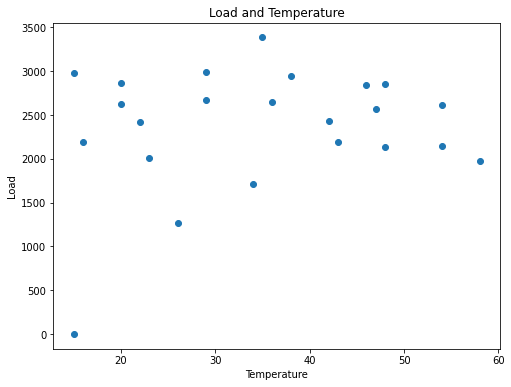

In [ ]:
#Correlation analysis of electricity consumption data and temperature data
x1 = df_factors8["temp_h8"]
y1 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15) 
mine.compute_score(x1, y1)
mic1 = mine.mic() #0.41602
pearson1 = np.corrcoef(x1, y1)[0, 1]
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(x1, y1)
ax1.set_title("Load and Temperature")
ax1.set_ylabel('Load')
ax1.set_xlabel('Temperature')
print("MIC:", mic1)
print("Pearson:",pearson1)

## （2）Correlation analysis with T-7 time power consumption data

MIC: 0.9986359641585717
Pearson: 0.99999956403016


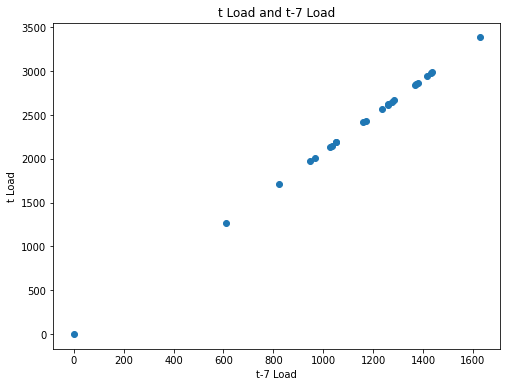

In [ ]:
#Correlation analysis of power consumption data at time t and power consumption data at time t-7
x2 = df_factors8["h1"]
y2 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x2, y2)
mic2 = mine.mic()
pearson2 = np.corrcoef(x2, y2)[0, 1]
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(1,1,1)
ax2.scatter(x2, y2)
ax2.set_title("t Load and t-7 Load")
ax2.set_ylabel('t Load')
ax2.set_xlabel('t-7 Load')
print("MIC:", mic2)
print("Pearson:",pearson2)

## （3） Correlation analysis with T-6 time electricity consumption data

MIC: 0.9986359641585717
Pearson: 0.9922217649237997


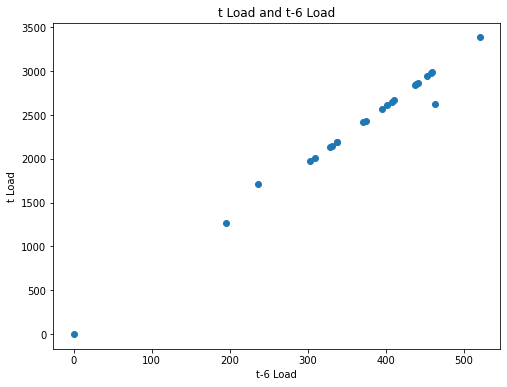

In [ ]:
#Correlation analysis of power consumption data at time t and time t-6
x3 = df_factors8["h2"]
y3 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x3, y3)
mic3 = mine.mic()
pearson3 = np.corrcoef(x3, y3)[0, 1]
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.add_subplot(1,1,1)
ax3.scatter(x3, y3)
ax3.set_title("t Load and t-6 Load")
ax3.set_ylabel('t Load')
ax3.set_xlabel('t-6 Load')
print("MIC:", mic3)
print("Pearson:",pearson3)

## （4） Correlation analysis of power consumption data with T-5 time

MIC: 0.9986359641585717
Pearson: 0.9999923482677973


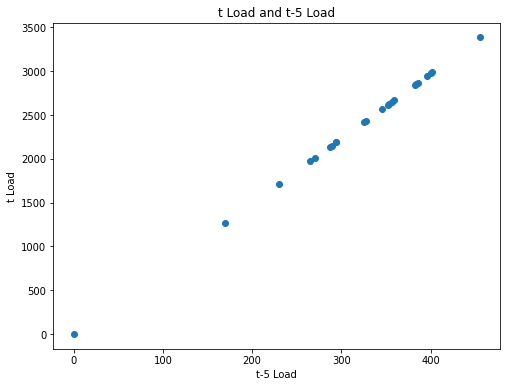

In [ ]:
#Correlation analysis of power consumption data at time t and time t-5
x4 = df_factors8["h3"]
y4 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x4, y4)
mic4 = mine.mic()
pearson4 = np.corrcoef(x4, y4)[0, 1]
fig4 = plt.figure(figsize=(8,6))
ax4 = fig4.add_subplot(1,1,1)
ax4.scatter(x4, y4)
ax4.set_title("t Load and t-5 Load")
ax4.set_ylabel('t Load')
ax4.set_xlabel('t-5 Load')
print("MIC:", mic4)
print("Pearson:",pearson4)

## （5） Correlation analysis of power consumption data with T-4 time

MIC: 0.6108235929175282
Pearson: 0.39455373737157595


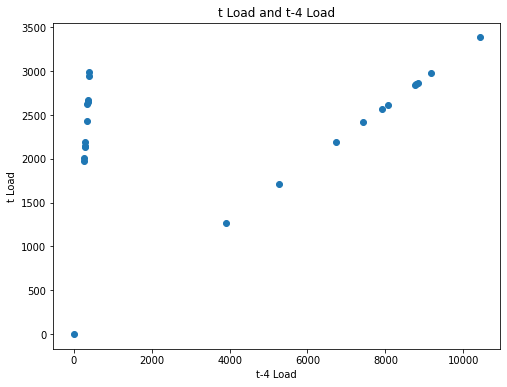

In [ ]:
#Correlation analysis of power consumption data at time t and time t-4
x5 = df_factors8["h4"]
y5 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x5, y5)
mic5 = mine.mic()
pearson5 = np.corrcoef(x5, y5)[0, 1]
fig5 = plt.figure(figsize=(8,6))
ax5 = fig5.add_subplot(1,1,1)
ax5.scatter(x5, y5)
ax5.set_title("t Load and t-4 Load")
ax5.set_ylabel('t Load')
ax5.set_xlabel('t-4 Load')
print("MIC:", mic5)
print("Pearson:",pearson5)

## （6） Correlation analysis of power consumption data at time T-3

MIC: 0.9116794424194413
Pearson: 0.9886417135595413


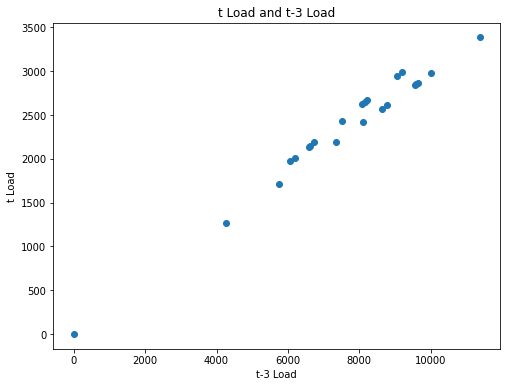

In [ ]:
#Correlation analysis of power consumption data at time t and time t-3
x6 = df_factors8["h5"]
y6 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x6, y6)
mic6 = mine.mic()
pearson6 = np.corrcoef(x6, y6)[0, 1]
fig6 = plt.figure(figsize=(8,6))
ax6 = fig6.add_subplot(1,1,1)
ax6.scatter(x6, y6)
ax6.set_title("t Load and t-3 Load")
ax6.set_ylabel('t Load')
ax6.set_xlabel('t-3 Load')
print("MIC:", mic6)
print("Pearson:",pearson6)

（7） Correlation analysis of power consumption data at time T-2

MIC: 0.7855618094542499
Pearson: 0.9886417135595413


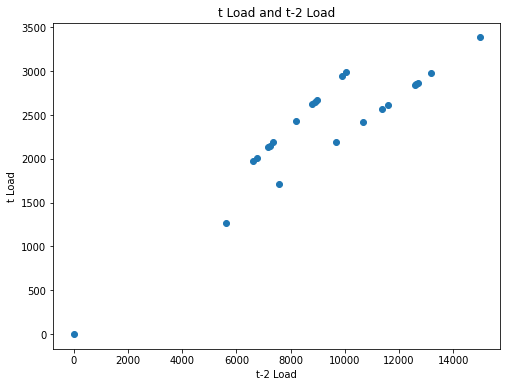

In [ ]:
#Correlation analysis of power consumption data at time t and time t-2
x7 = df_factors8["h6"]
y7 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x7, y7)
mic7 = mine.mic()
pearson7 = np.corrcoef(x6, y6)[0, 1]
fig7 = plt.figure(figsize=(8,6))
ax7 = fig7.add_subplot(1,1,1)
ax7.scatter(x7, y7)
ax7.set_title("t Load and t-2 Load")
ax7.set_ylabel('t Load')
ax7.set_xlabel('t-2 Load')
print("MIC:", mic7)
print("Pearson:",pearson7)

（8） Correlation analysis of power consumption data at time T-1

MIC: 0.7359470954643796
Pearson: 0.8616194026710468


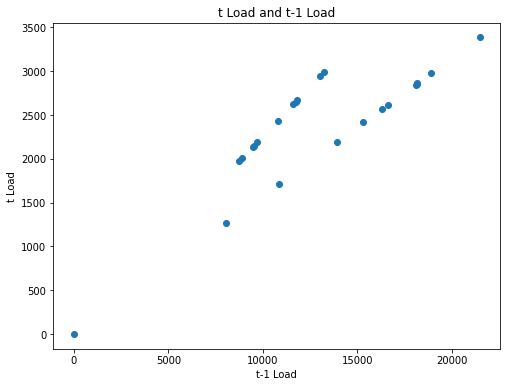

In [ ]:
#Correlation analysis of power consumption data at time t and time t-1
x8 = df_factors8["h7"]
y8 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x8, y8)
mic8 = mine.mic()
pearson8 = np.corrcoef(x8, y8)[0, 1]
fig8 = plt.figure(figsize=(8,6))
ax8 = fig8.add_subplot(1,1,1)
ax8.scatter(x8, y8)
ax8.set_title("t Load and t-1 Load")
ax8.set_ylabel('t Load')
ax8.set_xlabel('t-1 Load')
print("MIC:", mic8)
print("Pearson:",pearson8)

## （9） Correlation analysis with electricity consumption data at time d-1, t

MIC: 0.3068082095962246
Pearson: 0.3366810504205936


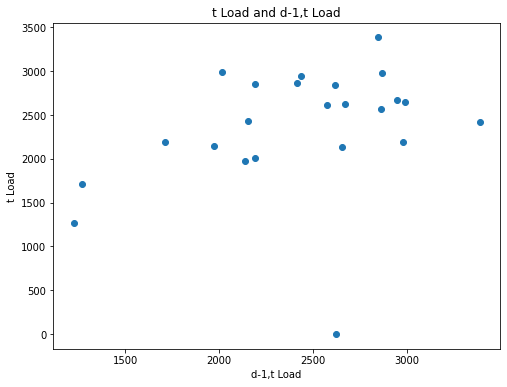

In [ ]:
#Correlation analysis of the electricity consumption data at time t and the electricity consumption data at time d-1 and t
x9 = df_factors8["d-1_h8"]
y9 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x9, y9)
mic9 = mine.mic()
pearson9 = np.corrcoef(x9, y9)[0, 1]
fig9 = plt.figure(figsize=(8,6))
ax9 = fig9.add_subplot(1,1,1)
ax9.scatter(x9, y9)
ax9.set_title("t Load and d-1,t Load")
ax9.set_ylabel('t Load')
ax9.set_xlabel('d-1,t Load')
print("MIC:", mic9)
print("Pearson:",pearson9)

## （10）Correlation analysis with holiday data

MIC: 0.17238983575098207
Pearson: 0.015266545539028327


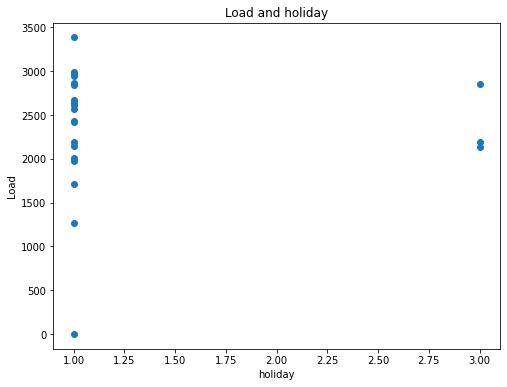

In [ ]:
#Correlation analysis of electricity consumption data at time t and holiday data
x10 = df_factors8["holiday"]
y10 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x10, y10)
mic10 = mine.mic()
pearson10 = np.corrcoef(x10, y10)[0, 1]
fig10 = plt.figure(figsize=(8,6))
ax10 = fig10.add_subplot(1,1,1)
ax10.scatter(x10, y10)
ax10.set_title("Load and holiday")
ax10.set_ylabel('Load')
ax10.set_xlabel('holiday')
print("MIC:", mic10)
print("Pearson:",pearson10)

## （11） Correlation analysis with monthly data

MIC: 0.3063165949447211
Pearson: 0.13017517177276358


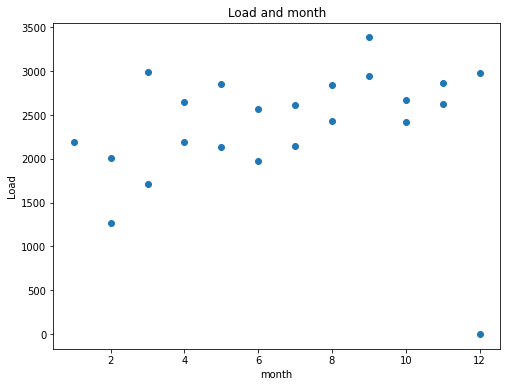

In [ ]:
#Correlation analysis of electricity consumption data at time t and monthly data
x11 = df_factors8["month"]
y11 = df_factors8["h8"]
mine = MINE(alpha = 0.6, c = 15)
mine.compute_score(x11, y11)
mic11 = mine.mic()
pearson11 = np.corrcoef(x11, y11)[0, 1]
fig11 = plt.figure(figsize=(8,6))
ax11 = fig11.add_subplot(1,1,1)
ax11.scatter(x11, y11)
ax11.set_title("Load and month")
ax11.set_ylabel('Load')
ax11.set_xlabel('month')
print("MIC:", mic11)
print("Pearson:",pearson11)